In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
dataset_path = '/content/gdrive/My Drive/project/dataset/'

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
dataset = pd.read_csv(dataset_path+'processed/cleanDatasetWithEncoding.csv')

In [ ]:
len(dataset.columns)

71

Test Train Split

In [ ]:
features = dataset.loc[:, dataset.columns != 'Label'].astype('float64')
labels = dataset['Label']
features.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
0,49188.0,4.0,2.0,0.0,12.0,0.0,6.0,6.0,6.000000,0.000000,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49486.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.000000,0.000000,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,88.0,609.0,7.0,4.0,484.0,414.0,233.0,0.0,69.142857,111.967895,...,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,88.0,879.0,9.0,4.0,656.0,3064.0,313.0,0.0,72.888889,136.153814,...,7.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,88.0,1160.0,9.0,6.0,3134.0,3048.0,1552.0,0.0,348.222222,682.482560,...,7.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=.3, random_state=42)

In [ ]:
features_train.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
1905425,53.0,44657.0,1.0,1.0,95.0,177.0,95.0,95.0,95.0,0.000000,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2187640,53.0,31989.0,2.0,2.0,88.0,224.0,44.0,44.0,44.0,0.000000,...,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1493561,443.0,14742152.0,10.0,10.0,1051.0,5752.0,517.0,0.0,105.1,188.990564,...,3.0,32.0,195958.0,0.0,195958.0,195958.0,9997602.0,0.0,9997602.0,9997602.0
2140543,53.0,60522.0,2.0,2.0,76.0,342.0,38.0,38.0,38.0,0.000000,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1439610,443.0,33662938.0,16.0,11.0,1024.0,14253.0,501.0,0.0,64.0,134.790702,...,15.0,20.0,153791.0,0.0,153791.0,153791.0,33500000.0,0.0,33500000.0,33500000.0


## Univariate Statistics method for Feature Selection

In [ ]:
from sklearn.feature_selection import VarianceThreshold
# We want to see column here 95% of the value in a feature/column is same 
# Selecting features with less than 5% variance
var_constant = 0.10
var_thr = VarianceThreshold(threshold = var_constant)  
var_thr.fit(features_train)
variance_stat = var_thr.get_support()
print(f"The {len(variance_stat[variance_stat==False])} have low variance than {var_constant*100}% out of {len(features_train.columns)} features.")
print(f'Following are the features with low variance')
print(features_train.columns[np.invert(variance_stat)])


The 8 have low variance than 10.0% out of 70 features.
Following are the features with low variance
Index(['FwdPSHFlags', 'FwdURGFlags', 'FINFlagCount', 'SYNFlagCount',
       'RSTFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount'],
      dtype='object')


## Bivariate Statistics

### Pairwise Correlation

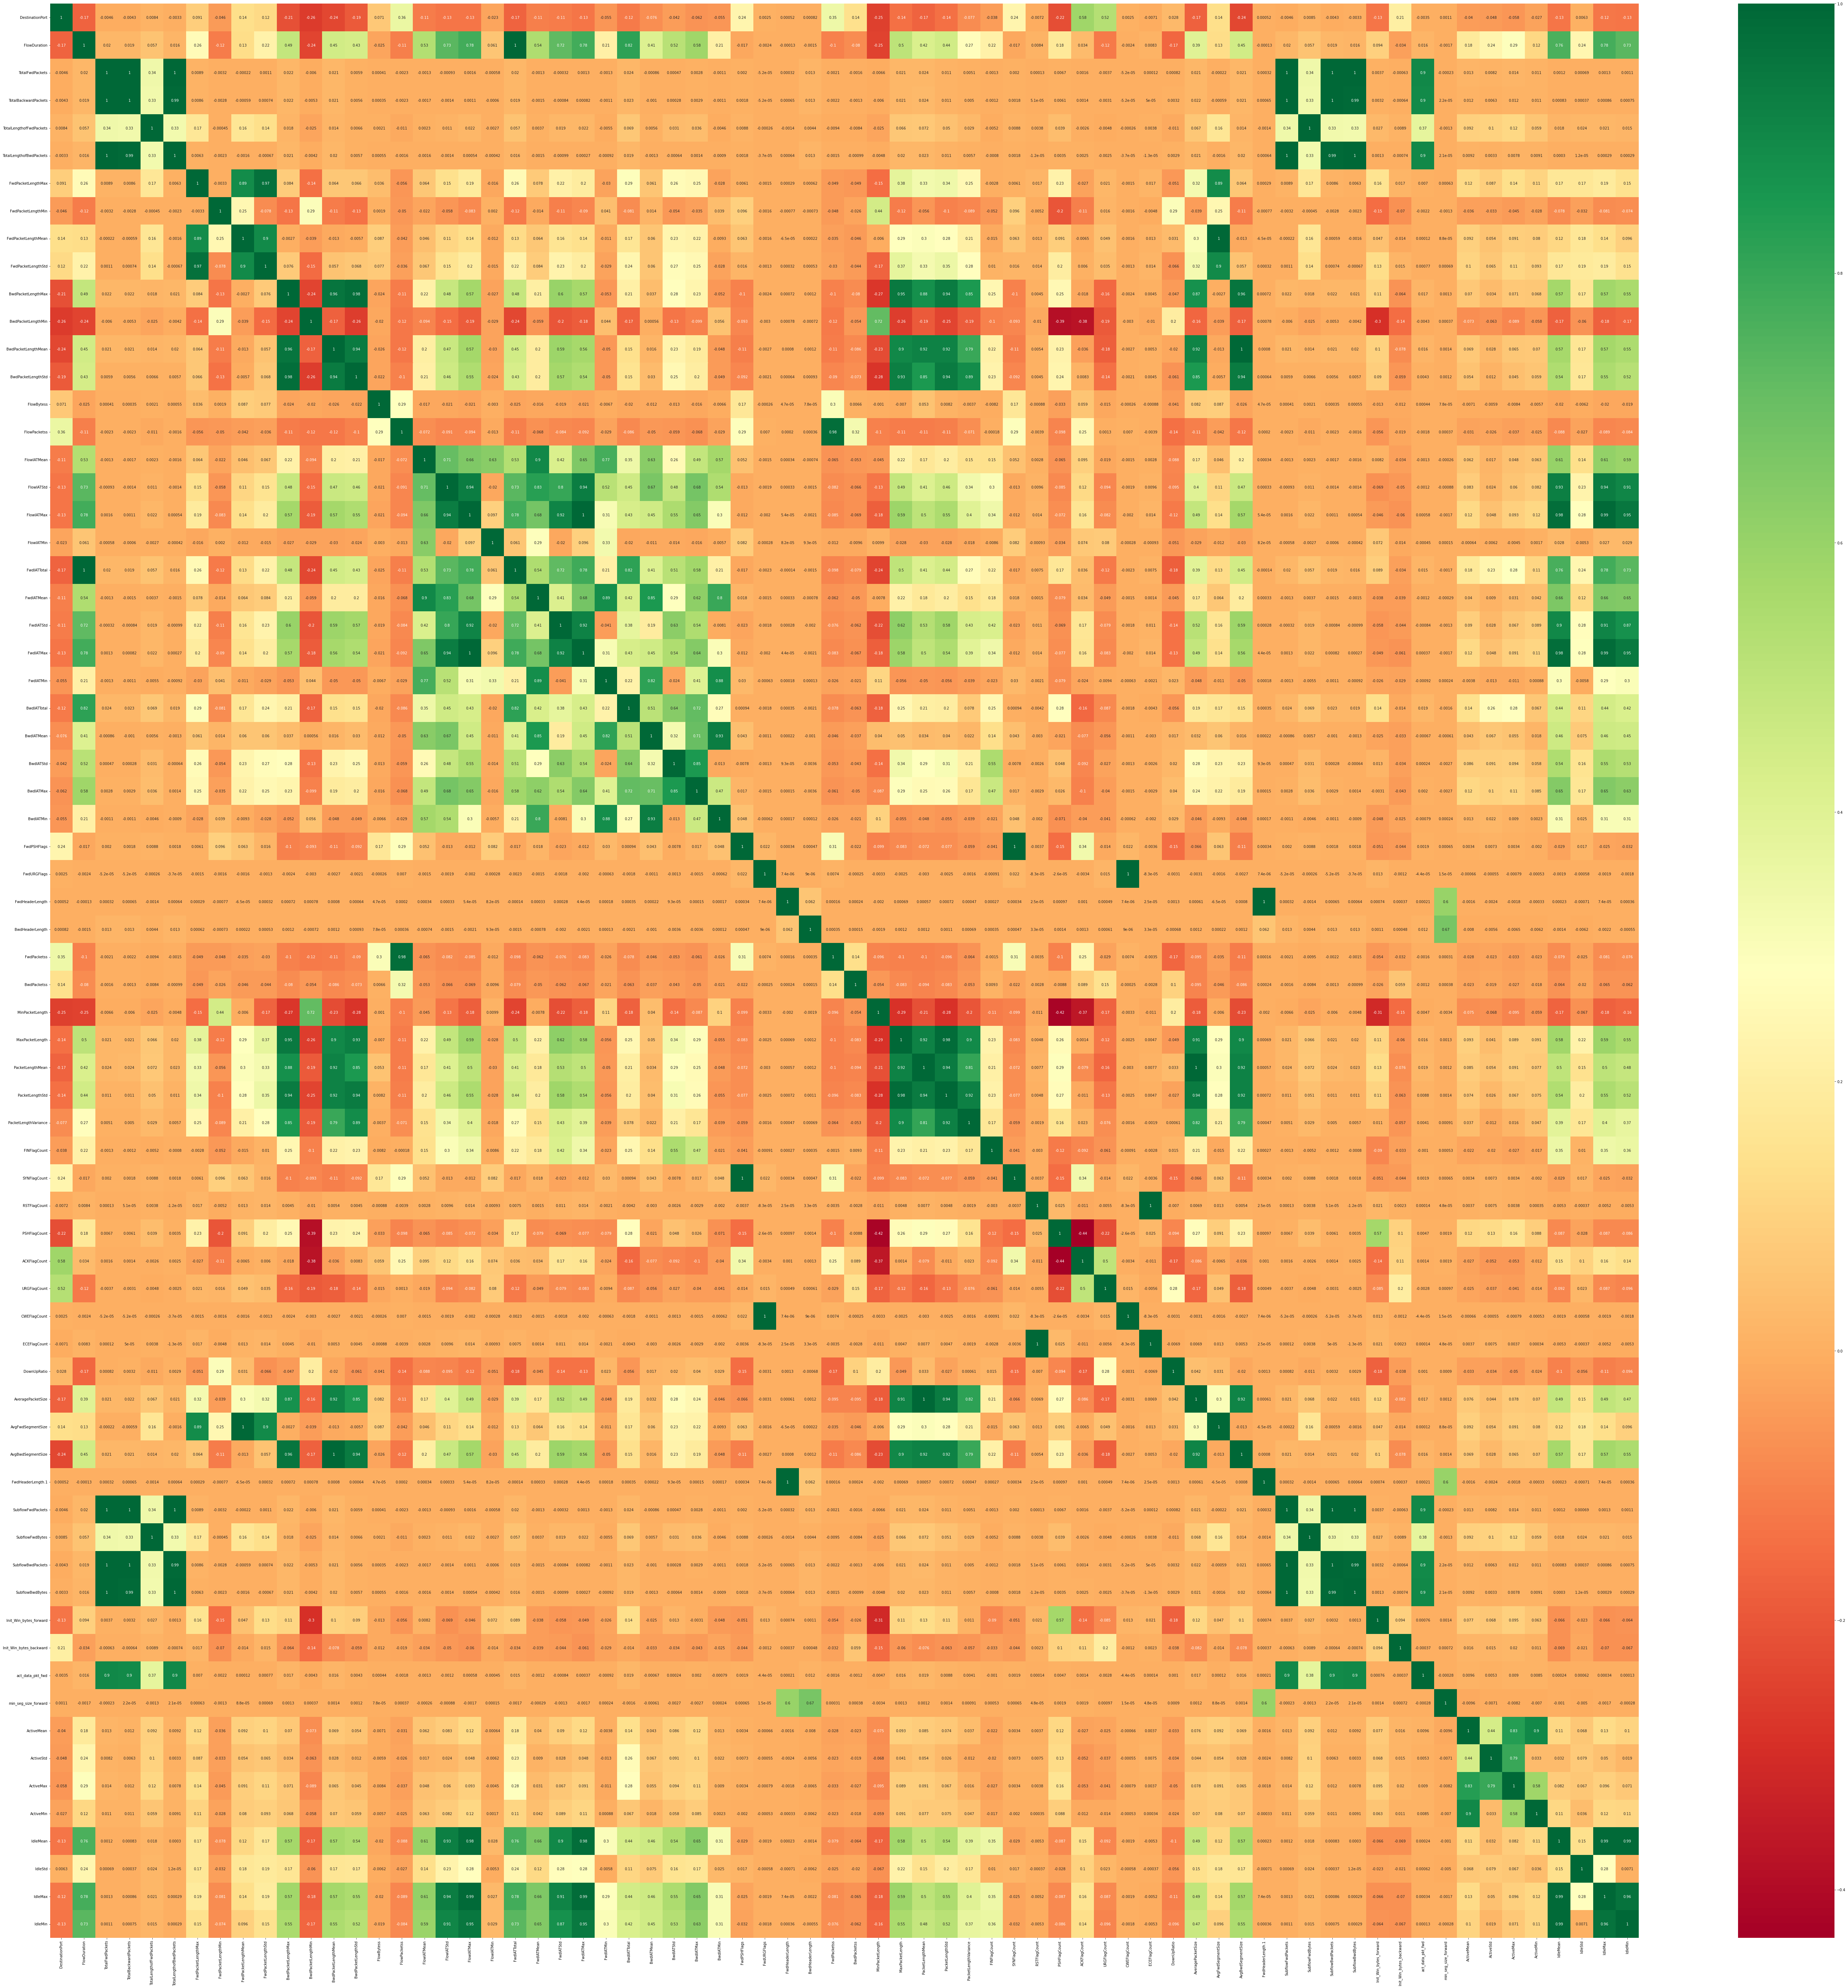

In [ ]:
feature_corr_matrix = features_train.corr()
plt.figure(figsize=(100,100)) # (width, height)
sns.heatmap(feature_corr_matrix, annot=True,cmap="RdYlGn")

In [ ]:
#feature reduction 
#dropping very high correlated features 
corr_matrix = feature_corr_matrix.abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
correlation_threshold = 0.95
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]
print(f"Following are the redundant {len(to_drop)} features with correlation greater than {correlation_threshold*100}")
for col in to_drop:
  print(col)

Following are the redundant 23 features with correlation greater than 95.0
TotalBackwardPackets
TotalLengthofBwdPackets
FwdPacketLengthStd
BwdPacketLengthMean
BwdPacketLengthStd
FwdIATTotal
FwdIATMax
FwdPacketss
PacketLengthStd
SYNFlagCount
CWEFlagCount
ECEFlagCount
AveragePacketSize
AvgFwdSegmentSize
AvgBwdSegmentSize
FwdHeaderLength.1
SubflowFwdPackets
SubflowFwdBytes
SubflowBwdPackets
SubflowBwdBytes
IdleMean
IdleMax
IdleMin


### Correlation of features with Target variables

In [ ]:
def corelationHeatMap(col_name):
  corr_matrix = dataset.corr() 
  corr_matrix_cols = corr_matrix.columns
  plt.figure(figsize=(20,60)) # (width, height)
  index = [i for (i,each) in enumerate(corr_matrix.columns) if each == col_name][0]
  sns.heatmap(corr_matrix.iloc[:, [index]], annot=True,cmap="RdYlGn")

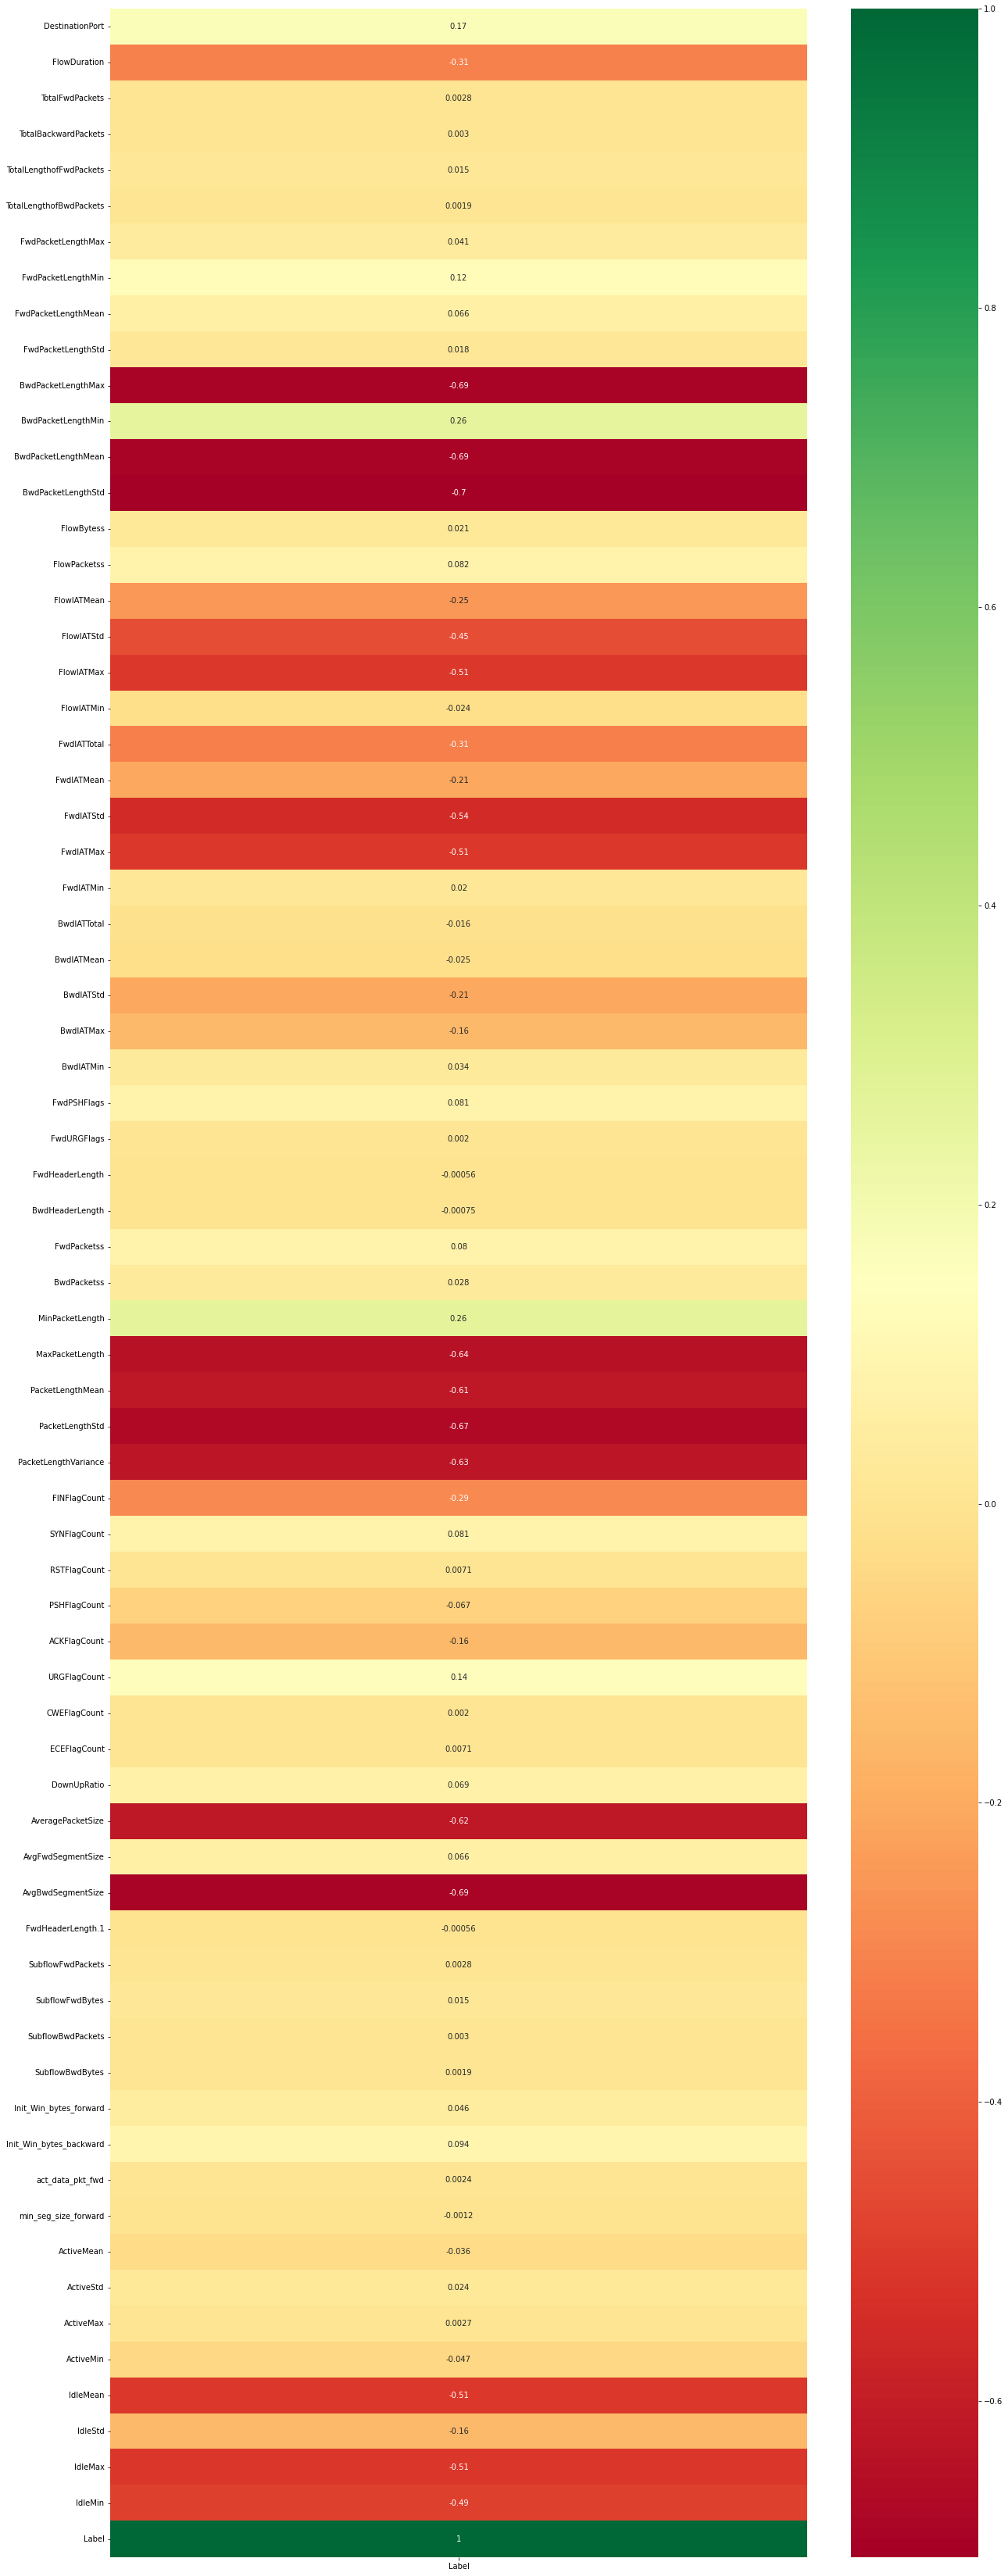

In [ ]:
corelationHeatMap("Label")